In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Action:             #This class represents an action that can be taken in the bandit problem.
  def __init__(self, m):
    self.m = m            #Initializes an action with a given mean m, which represents the true mean reward of the action.
    self.mean = 0         #Represents the current estimate of the mean reward for the action.
    self.N = 0            #Represents the number of times this action has been chosen.
  def select(self):       #Chooses the action and returns a reward.
    return np.random.normal(0,1) + self.m   #It randomly samples from a normal distribution with mean self.m and standard deviation 1. This simulates the reward received when selecting the action.

# Update the action-value estimate
  def update(self, x, alpha=0.1):   #Updates the action's estimate of the mean reward based on a new observation x
    self.N += 1
    self.mean = self.mean + alpha*(x-self.mean) #simple incremental update rule that updates the mean reward estimate using a step size alpha which is 0.1.

**Update Method**
*   When an action is selected and its reward is observed (represented by x), the update method is called to update the action's estimate of the mean reward.
*   This method implements a simple incremental update formula for updating the mean reward estimate. The formula is derived from the sample mean update rule in statistics and is a form of incremental learning.
*   The formula updates the mean estimate (self.mean) by moving it slightly towards the observed reward x. The step size of the update is controlled by the alpha parameter, where smaller values of alpha result in slower adaptation to new observations.





# **Two Arm Bandit**

In [ ]:
'''This function takes four parameters:
m1: The mean reward of the first action (arm).
m2: The mean reward of the second action (arm).
eps: The probability of choosing a random action (exploration rate).
N: The total number of iterations (time steps) to run the bandit problem.'''

def two_arm_bandit_epsilon_greedy(m1, m2, eps, N):
  actions = [Action(m1), Action(m2)]                      #initializes two actions with means m1 and m2.
  data = np.empty(N)                                      #initializes an empty array data to store the rewards obtained in each iteration.
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()                                #generates a random number p between 0 and 1.
    if p < eps:                                           #If p is less than eps, the algorithm chooses to explore by randomly selecting one of the actions.
      j = np.random.choice(2)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x                                            #It stores the observed reward x in the data array.
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)     #calculates the cumulative average reward obtained at each time step and plots it.
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")     #prints the final estimated mean rewards for each action.
  return cumulative_average                                         #returns the cumulative average rewards over time.

**Two Armed Bandit Problem**

*   The algorithm balances exploration and exploitation using the epsilon-greedy strategy. With probability eps, it explores by choosing a random action, and with probability 1-eps, it exploits by choosing the action with the highest estimated reward.
*   It maintains estimates of the mean rewards for each action and updates them incrementally based on observed rewards.
The algorithm's performance is evaluated by plotting the cumulative average reward over time and printing relevant statistics such as exploration and exploitation counts and final estimated mean rewards.



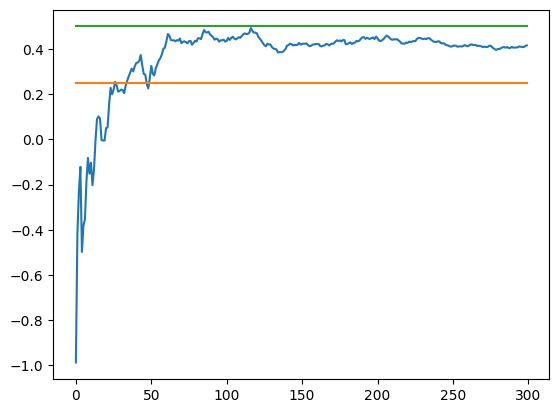

No of times explored:  37
No of times exploited:  263
Mean of rewards from arm 1: -0.06049421671924556
Mean of rewards from arm 2: 0.6393193461465718


In [ ]:
c1 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.1, 300)

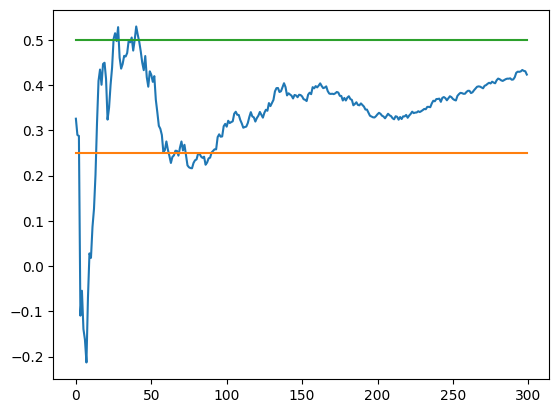

No of times explored:  12
No of times exploited:  288
Mean of rewards from arm 1: -0.06987938182177636
Mean of rewards from arm 2: 0.5014647031033637


In [ ]:
c2 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.05, 300)

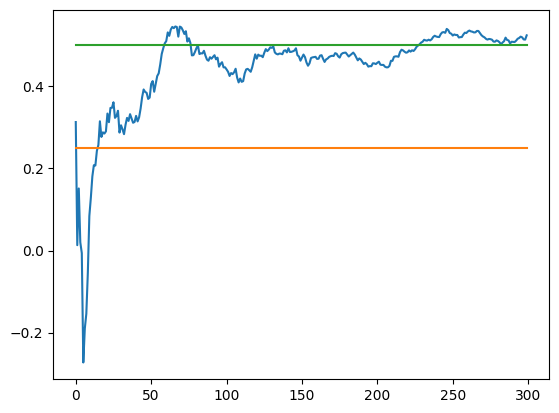

No of times explored:  6
No of times exploited:  294
Mean of rewards from arm 1: 0.031033227732124885
Mean of rewards from arm 2: 0.8166665900124512


In [ ]:
c3 = two_arm_bandit_epsilon_greedy(0.25, 0.5, 0.01, 300)

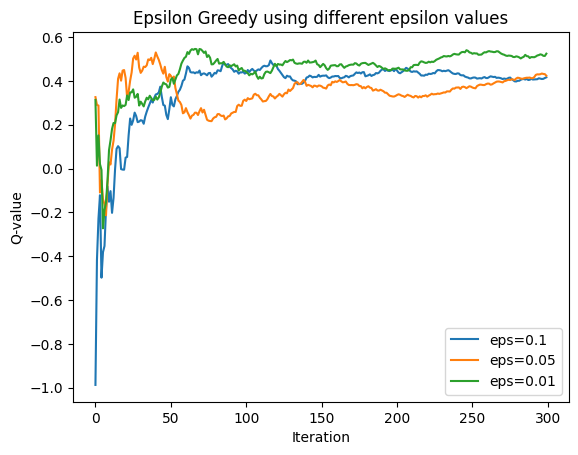

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

# **Three Arm Bandit**

In [ ]:
def three_arm_bandit_epsilon_greedy(m1, m2, m3, eps, N):
  actions = [Action(m1), Action(m2), Action(m3)]
  data = np.empty(N)
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()
    if p < eps:
      j = np.random.choice(3)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")
  return cumulative_average

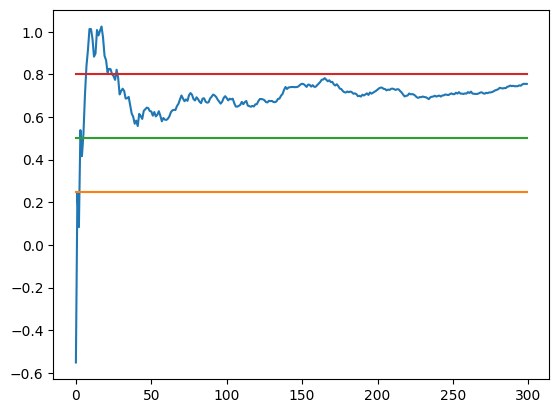

No of times explored:  33
No of times exploited:  267
Mean of rewards from arm 1: 0.32521626358429284
Mean of rewards from arm 2: -0.04012655167655445
Mean of rewards from arm 3: 1.1036698181755653


In [ ]:
c1 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.1, 300)

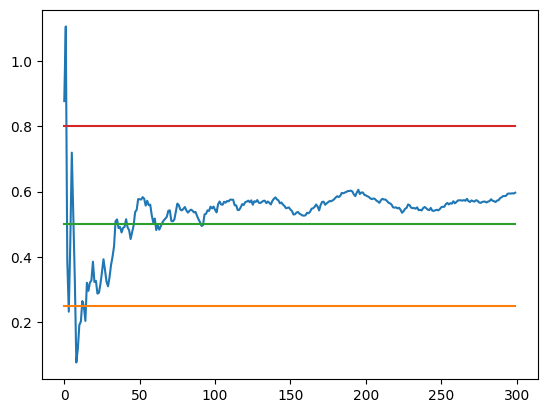

No of times explored:  13
No of times exploited:  287
Mean of rewards from arm 1: 0.06709835978269843
Mean of rewards from arm 2: 0.027821906666602336
Mean of rewards from arm 3: 0.9659349043092988


In [ ]:
c2 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.05, 300)

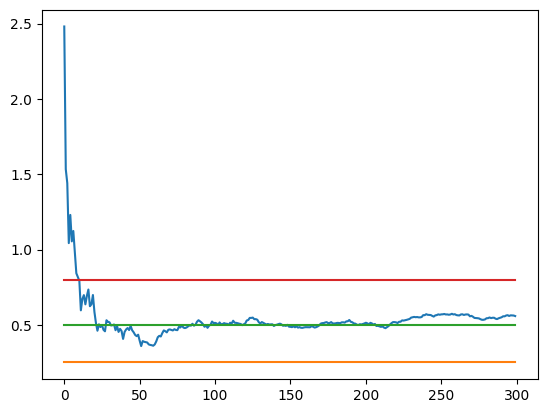

No of times explored:  6
No of times exploited:  294
Mean of rewards from arm 1: 0.028864897553692842
Mean of rewards from arm 2: 0.03955023063747082
Mean of rewards from arm 3: 0.6706774632852016


In [ ]:
c3 = three_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.01, 300)

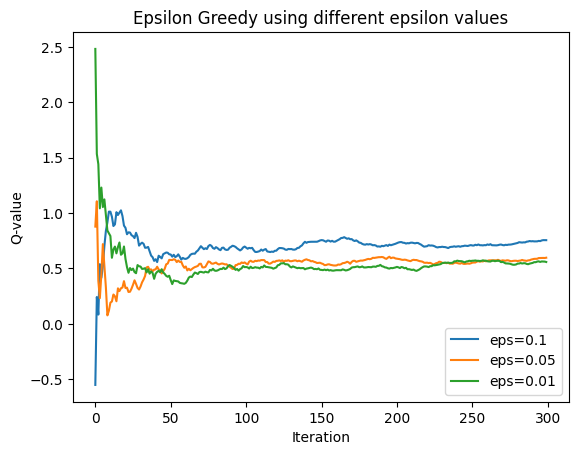

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.01')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

**Four-arm bandit**

In [ ]:
def four_arm_bandit_epsilon_greedy(m1, m2, m3,m4, eps, N):
  actions = [Action(m1), Action(m2), Action(m3), Action(m4)]
  data = np.empty(N)
  explore,exploit=0,0
  for i in range(N):
    p = np.random.random()
    if p < eps:
      j = np.random.choice(4)
      explore+=1
    else:
      j = np.argmax([a.mean for a in actions])
      exploit+=1
    x = actions[j].select()
    actions[j].update(x,0.1)
    data[i] = x
  cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
  plt.plot(cumulative_average)
  plt.plot(np.ones(N)*m1)
  plt.plot(np.ones(N)*m2)
  plt.plot(np.ones(N)*m3)
  plt.plot(np.ones(N)*m4)
  plt.show()
  print("No of times explored: ",explore)
  print("No of times exploited: ",exploit)
  for i in range(len(actions)):
    print(f"Mean of rewards from arm {i+1}: {actions[i].mean}")
  return cumulative_average

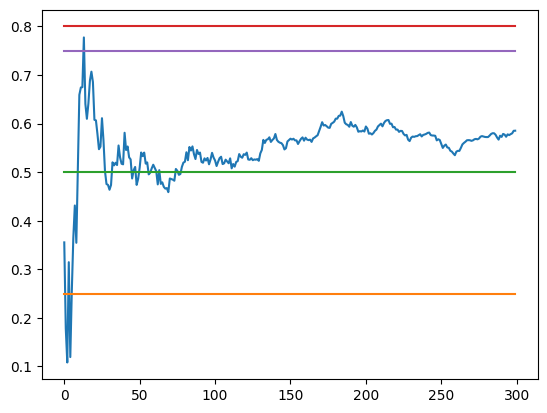

No of times explored:  20
No of times exploited:  280
Mean of rewards from arm 1: 0.19642302555097102
Mean of rewards from arm 2: 0.31169902765321544
Mean of rewards from arm 3: 0.039218269778056425
Mean of rewards from arm 4: 0.8068452065849857


In [ ]:
c1 = four_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8,0.75, 0.1, 300)

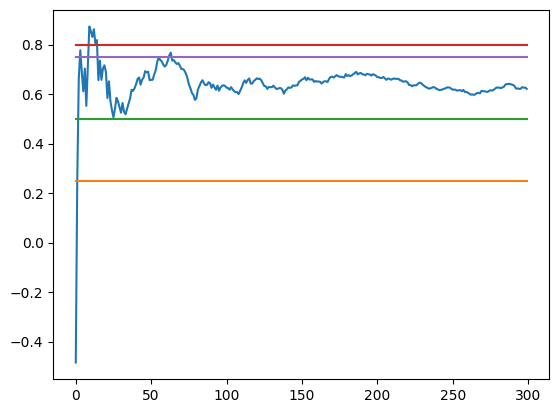

No of times explored:  13
No of times exploited:  287
Mean of rewards from arm 1: 0.116355238947526
Mean of rewards from arm 2: -0.09093546678070952
Mean of rewards from arm 3: 0.07096367539266014
Mean of rewards from arm 4: 0.6132270956491285


In [ ]:
c2 = four_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.75, 0.05, 300)

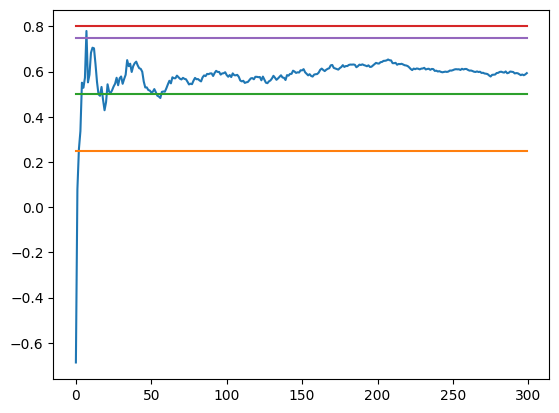

No of times explored:  11
No of times exploited:  289
Mean of rewards from arm 1: -0.02997362415817348
Mean of rewards from arm 2: 0.0801387736654088
Mean of rewards from arm 3: 0.059662359056604164
Mean of rewards from arm 4: 0.647306521008045


In [ ]:
c3 = four_arm_bandit_epsilon_greedy(0.25, 0.5, 0.8, 0.75, 0.02, 300)

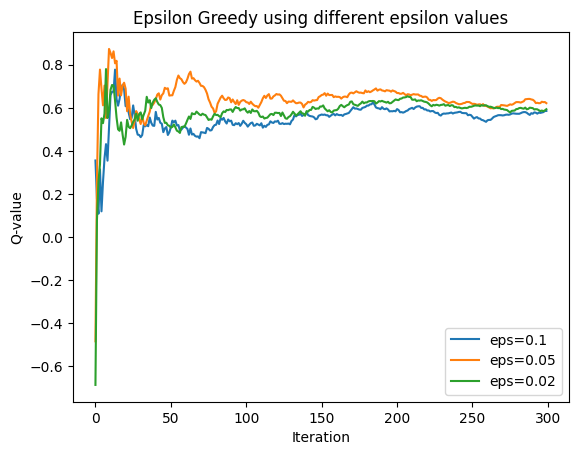

In [ ]:
plt.plot(c1,label='eps=0.1')
plt.plot(c2,label='eps=0.05')
plt.plot(c3,label='eps=0.02')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

Enter the number of arms (N): 6
Enter the true mean for arm 1: 0.25
Enter the true mean for arm 2: 0.5
Enter the true mean for arm 3: 0.7
Enter the true mean for arm 4: 0.8
Enter the true mean for arm 5: 0.85
Enter the true mean for arm 6: 0.95


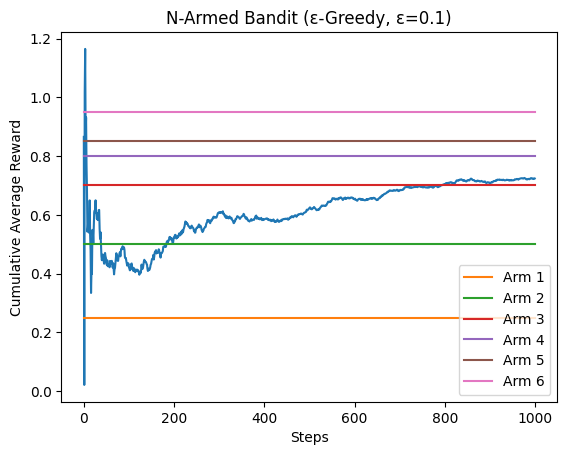

Number of times explored: 108
Number of times exploited: 892
Mean of rewards from arm 1: -0.2786483131297244
Mean of rewards from arm 2: 0.0964946008208118
Mean of rewards from arm 3: 0.2374530220675763
Mean of rewards from arm 4: 0.5855088887716805
Mean of rewards from arm 5: 0.8205405891206922
Mean of rewards from arm 6: 0.5596388789122093


array([0.86548002, 0.02061535, 1.01672138, 1.16519577, 0.87418436,
       0.93178959, 0.76776833, 0.68235268, 0.54247077, 0.55768733,
       0.58859687, 0.59343673, 0.53853332, 0.64925763, 0.53153553,
       0.47906805, 0.33389094, 0.41274899, 0.39913447, 0.54878564,
       0.5388277 , 0.50417669, 0.55486115, 0.60834636, 0.61512621,
       0.61231244, 0.6494525 , 0.60718151, 0.60396979, 0.58564938,
       0.60471747, 0.58206039, 0.5973124 , 0.61606131, 0.61673912,
       0.55305011, 0.51840671, 0.54100205, 0.49622309, 0.45935827,
       0.44556216, 0.45808024, 0.46473027, 0.46394341, 0.44261677,
       0.4335631 , 0.44294514, 0.47006789, 0.45889885, 0.45241522,
       0.43860534, 0.42930649, 0.4449173 , 0.42513699, 0.43265978,
       0.43086488, 0.43100249, 0.42143435, 0.44291635, 0.43648954,
       0.43325988, 0.43804102, 0.44327801, 0.43029934, 0.42049772,
       0.43503217, 0.41856975, 0.39729921, 0.41410804, 0.4186163 ,
       0.43513076, 0.45094022, 0.46918569, 0.46297061, 0.44509

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Action:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.mean = 0
        self.N = 0

    def select(self):
        # Simulate pulling the arm (returns a reward)
        return np.random.normal(self.true_mean, 1)

    def update(self, x, alpha=0.1):
        # Update the mean estimate using incremental averaging
        self.N += 1
        self.mean = (1 - alpha) * self.mean + alpha * x

def n_arm_bandit(arms, eps, N):
    actions = [Action(true_mean) for true_mean in arms]
    data = np.empty(N)
    explore, exploit = 0, 0

    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(actions))
            explore += 1
        else:
            j = np.argmax([a.mean for a in actions])
            exploit += 1

        x = actions[j].select()
        actions[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot cumulative average rewards
    plt.plot(cumulative_average)
    for i, arm in enumerate(arms):
        plt.plot(np.ones(N) * arm, label=f"Arm {i + 1}")
    plt.legend()
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Average Reward")
    plt.title(f"N-Armed Bandit (ε-Greedy, ε={eps})")
    plt.show()

    print("Number of times explored:", explore)
    print("Number of times exploited:", exploit)
    for i, action in enumerate(actions):
        print(f"Mean of rewards from arm {i + 1}: {action.mean}")

    return cumulative_average

# Input the number of arms (N)
n = int(input("Enter the number of arms (N): "))

# Input the true means for each arm
arms = []
for i in range(n):
    true_mean = float(input(f"Enter the true mean for arm {i + 1}: "))
    arms.append(true_mean)

# Set exploration probability (ε)
epsilon = 0.1

# Number of steps (pulls)
num_steps = 1000

# Run the bandit algorithm
n_arm_bandit(arms, epsilon, num_steps)


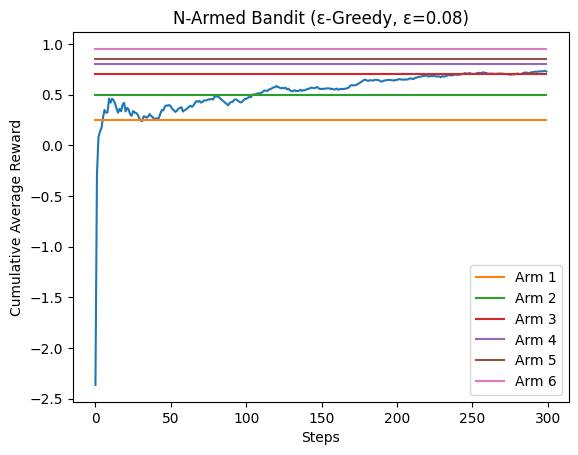

Number of times explored: 24
Number of times exploited: 276
Mean of rewards from arm 1: 0.026771723204677238
Mean of rewards from arm 2: 0.3189506183269275
Mean of rewards from arm 3: 0.2471723332671263
Mean of rewards from arm 4: 1.1471434312290076
Mean of rewards from arm 5: 0.030178102601989998
Mean of rewards from arm 6: -0.02590413372987497


In [ ]:
c1=n_arm_bandit(arms, 0.08, 300)

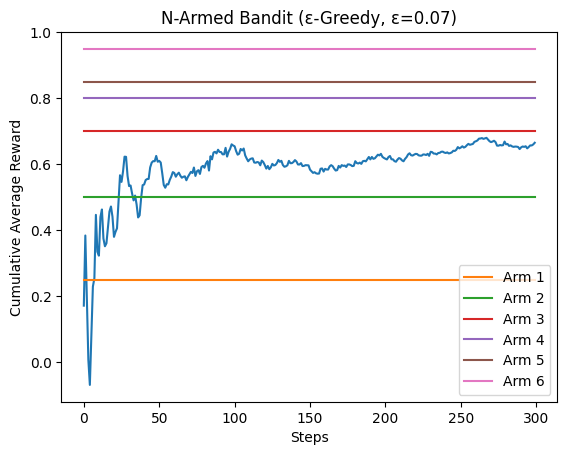

Number of times explored: 22
Number of times exploited: 278
Mean of rewards from arm 1: 0.240939092077102
Mean of rewards from arm 2: 0.302413631758728
Mean of rewards from arm 3: 0.9775335284569211
Mean of rewards from arm 4: -0.056567084447242524
Mean of rewards from arm 5: 0.3970584729765848
Mean of rewards from arm 6: 0.3122512223808226


In [ ]:
c2=n_arm_bandit(arms, 0.07, 300)

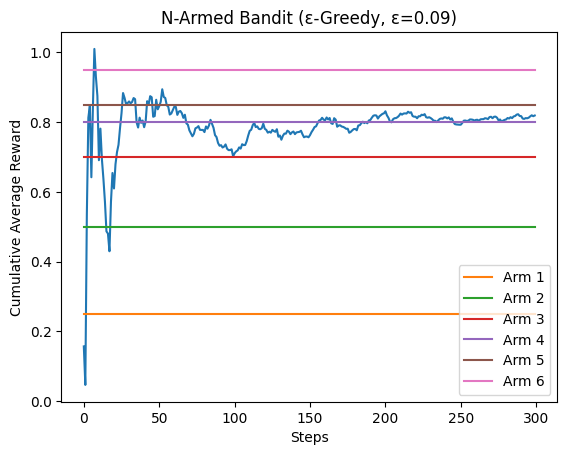

Number of times explored: 26
Number of times exploited: 274
Mean of rewards from arm 1: 0.38343946696342085
Mean of rewards from arm 2: 0.30274418463624275
Mean of rewards from arm 3: 0.3463100938612109
Mean of rewards from arm 4: 0.23246430513080568
Mean of rewards from arm 5: 0.9709482417362606
Mean of rewards from arm 6: 0.14427911196181079


In [ ]:
c3=n_arm_bandit(arms, 0.09, 300)

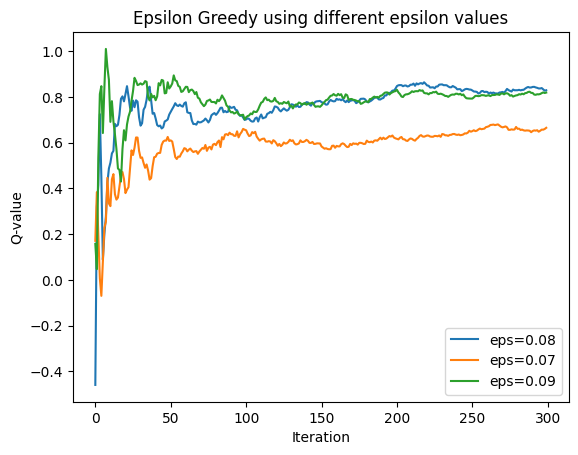

In [ ]:
plt.plot(c1,label='eps=0.08')
plt.plot(c2,label='eps=0.07')
plt.plot(c3,label='eps=0.09')
plt.xlabel('Iteration')
plt.ylabel('Q-value')
plt.title('Epsilon Greedy using different epsilon values')
plt.legend(loc='lower right')

**NON-STATIONARY**

Enter the number of arms (N): 3
Enter the true mean for arm 1: 0.2
Enter the true mean for arm 2: 0.4
Enter the true mean for arm 3: 0.6


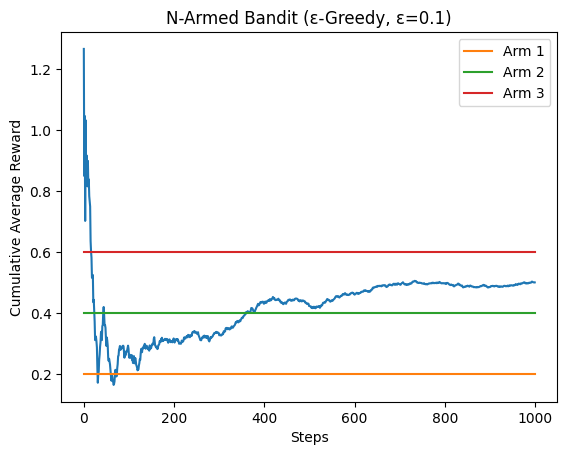

Number of times explored: 122
Number of times exploited: 878
Mean of rewards from arm 1: 0.0569466185138553
Mean of rewards from arm 2: 0.13070429654533633
Mean of rewards from arm 3: 0.56429700457991


array([1.26686592, 0.84993099, 1.04697344, 0.70265034, 1.03297719,
       0.87896961, 0.91778663, 0.87081673, 0.81602179, 0.89958413,
       0.81932697, 0.83886504, 0.78401778, 0.76880218, 0.75011286,
       0.63684241, 0.6027271 , 0.58176134, 0.516724  , 0.5152285 ,
       0.52524148, 0.43602699, 0.44391951, 0.40324973, 0.37244014,
       0.31157336, 0.32458756, 0.32060046, 0.30722749, 0.28764556,
       0.22088671, 0.17180862, 0.19904238, 0.20818164, 0.24717888,
       0.26340946, 0.28957704, 0.30471592, 0.3363437 , 0.3397504 ,
       0.31161018, 0.35736779, 0.36158798, 0.40105299, 0.42027882,
       0.39447673, 0.36083321, 0.36142968, 0.35202901, 0.31745363,
       0.29252534, 0.32017583, 0.30909776, 0.29219938, 0.25264269,
       0.24339588, 0.25054232, 0.24153349, 0.23175675, 0.21283188,
       0.18961792, 0.17872715, 0.19533459, 0.1905356 , 0.17677187,
       0.17532183, 0.16461604, 0.1682742 , 0.17634877, 0.20658043,
       0.21410959, 0.19673089, 0.19242443, 0.19354317, 0.21957

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Action:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.mean = 0
        self.N = 0

    def select(self):
        # Simulate pulling the arm (returns a reward)
        return np.random.normal(self.true_mean, 1)

    def update(self, x, alpha=0.1):
        # Update the mean estimate using incremental averaging
        self.N += 1
        self.mean = (1 - alpha) * self.mean + alpha * x

def n_arm_bandit(arms, eps, N):
    actions = [Action(true_mean) for true_mean in arms]
    data = np.empty(N)
    explore, exploit = 0, 0

    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(actions))
            explore += 1
        else:
            j = np.argmax([a.mean for a in actions])
            exploit += 1

        x = actions[j].select()
        actions[j].update(x)
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # Plot cumulative average rewards
    plt.plot(cumulative_average)
    for i, arm in enumerate(arms):
        plt.plot(np.ones(N) * arm, label=f"Arm {i + 1}")
    plt.legend()
    plt.xlabel("Steps")
    plt.ylabel("Cumulative Average Reward")
    plt.title(f"N-Armed Bandit (ε-Greedy, ε={eps})")
    plt.show()

    print("Number of times explored:", explore)
    print("Number of times exploited:", exploit)
    for i, action in enumerate(actions):
        print(f"Mean of rewards from arm {i + 1}: {action.mean}")

    return cumulative_average

# Input the number of arms (N)
n = int(input("Enter the number of arms (N): "))

# Input the true means for each arm
arms = []
for i in range(n):
    true_mean = float(input(f"Enter the true mean for arm {i + 1}: "))
    arms.append(true_mean)

# Set exploration probability (ε)
epsilon = 0.1

# Number of steps (pulls)
num_steps = 1000

# Run the bandit algorithm
n_arm_bandit(arms, epsilon, num_steps)
